In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


in un line di excel  trovi delle dichiarazioni e nell’altro trovi le righe delle dichiarazioni.
In pratica si tratta di trovare quali dati possono non essere attendibili

In [2]:
# IMPORT DEI FILES IN FORMATO CSV

dichiarazioni = pd.read_csv('CSV/Ricevute_AEE.csv')
righe = pd.read_csv('CSV/Righe_AEE.csv')


# ID MANCANTE 



# print('Dimensione', ricevute.shape)
# print('Numero di NaN per ogni colonna:\n', ricevute.isnull().sum())
# print('\nControllo tipo dato \n', ricevute.dtypes)

# print('\nRIGHE \n')
# print('Dimensione', righe.shape)
# print('\nNumero di NaN per ogni colonna: \n', righe.isnull().sum())
# print('\nControllo tipo dato \n', righe.dtypes)

In [3]:
# INFO DICHIARAZIONI
# print(dichiarazioni.info())
dichiarazioni.shape
# print('DICHIARAZIONI --> DIMENSIONI {} \n'.format(dichiarazioni.shape))
# print('dtypes\n{} \n'.format(dichiarazioni.dtypes))
# print('Numero di records', dichiarazioni.count())
# print('Numero di NaN per ogni colonna:\n', dichiarazioni.isnull().sum())


(6273, 8)

In [4]:
# Il numero dei ID_DICHIARAZIONE nel file delle dichiarazioni corrispondono al numero di records (6273) e non si ripetono
print('Numero totale di ID_DICHIARAZIONE: ', dichiarazioni.ID_DICHIARAZIONE.count())
print(any(dichiarazioni.ID_DICHIARAZIONE.value_counts()>1))

Numero totale di ID_DICHIARAZIONE:  6273
False


In [5]:
# INFO RIGHE DICHIARAZIONI
print(righe.info())
# print('RIGHE DICHIARAZIONI --> DIMENSIONI {} \n'.format(righe.shape))
# print('dtypes\n{} \n'.format(righe.dtypes))
# print('Numero di records\n', righe.count())
print('\nNumero di NaN per ogni colonna:\n', righe.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_DICHIARAZIONE      18115 non-null  int64  
 1   a_anno                18115 non-null  int64  
 2   a_mese                18115 non-null  int64  
 3   a_trimestre           18115 non-null  int64  
 4   a_imponibile          18115 non-null  object 
 5   a_peso                18115 non-null  object 
 6   a_quantita            18115 non-null  int64  
 7   a_codice_listino      18115 non-null  object 
 8   a_raggruppamento      18115 non-null  object 
 9   a_um_codice           18115 non-null  object 
 10  a_descrizione         18114 non-null  object 
 11  a_cod_categoria       18115 non-null  int64  
 12  a_cod_sottocategoria  18115 non-null  int64  
 13  a_cod_tipologia       18113 non-null  float64
 14  a_cod_sottotipologia  18115 non-null  int64  
 15  a_cod_comparto     

In [6]:
# Il numero dei ID_DICHIARAZIONE nel file RIGHE NON corrisponde al numero di records (6273) e molti si ripetono ma non tutti
print('Numero totale di ID_DICHIARAZIONE: ', righe.ID_DICHIARAZIONE.count())
print('Numero ID_DICHIARAZIONE unici: ', righe.ID_DICHIARAZIONE.nunique())
print('ID_DICHIARAZIONE si ripete ? -->', any(righe.ID_DICHIARAZIONE.value_counts()>1))
print('ID_DICHIARAZIONE si ripete con tutti ? -->', all(righe.ID_DICHIARAZIONE.value_counts()>1))

Numero totale di ID_DICHIARAZIONE:  18115
Numero ID_DICHIARAZIONE unici:  6272
ID_DICHIARAZIONE si ripete ? --> True
ID_DICHIARAZIONE si ripete con tutti ? --> False


In [7]:
# ID NON CONSIDERATO --> ID = 30154 --> FAI LIST(SET(df.ID_DICHIARAZIONE) - SET(ldf.where(df.ID_DICHIARAZIONE.notna()))) 
# lst = list(df.a_descrizione.unique()) ESEMPIO
ldf = pd.merge(dichiarazioni, righe, how='left', on='ID_DICHIARAZIONE')
# ldf.where(df.ID_DICHIARAZIONE.notna())
ldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18116 entries, 0 to 18115
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_DICHIARAZIONE      18116 non-null  int64  
 1   a_codice_ordine       18116 non-null  object 
 2   a_cod_comparto_x      18116 non-null  object 
 3   a_anno_x              18116 non-null  int64  
 4   a_mese_x              18116 non-null  int64  
 5   a_trimestre_x         18116 non-null  int64  
 6   a_peso_totale         18115 non-null  object 
 7   a_imponibile_x        18116 non-null  float64
 8   a_anno_y              18115 non-null  float64
 9   a_mese_y              18115 non-null  float64
 10  a_trimestre_y         18115 non-null  float64
 11  a_imponibile_y        18115 non-null  object 
 12  a_peso                18115 non-null  object 
 13  a_quantita            18115 non-null  float64
 14  a_codice_listino      18115 non-null  object 
 15  a_raggruppamento   

In [8]:
df = pd.merge(dichiarazioni, righe, on='ID_DICHIARAZIONE')

In [9]:
# CONTROLLO RIDONDANZA COLONNE
print(np.all(df.a_anno_x ==df.a_anno_y))
print(np.all(df.a_mese_x ==df.a_mese_y))
print(np.all(df.a_trimestre_x ==df.a_trimestre_y))
print(np.all(df.a_cod_comparto_x ==df.a_cod_comparto_y))
# ELIMINO COLONNE SUPERFLUE
delete_col = ['a_anno_y', 'a_mese_y', 'a_trimestre_y', 'a_cod_comparto_y']
rename_col = {'a_anno_x': 'a_anno', 'a_mese_x': 'a_mese', 'a_trimestre_x': 'a_trimestre', 'a_cod_comparto_x': 'a_cod_comparto'}
df = df.drop(delete_col, axis=1)
df = df.rename(columns=rename_col)
for col in ['a_anno', 'a_mese', 'a_trimestre']:
        print("convert ", df[col].name, " to string")
        df[col] = df[col].astype(str)

# df[['a_cod_categoria', 'a_descrizione']].head()
df.info()

True
True
True
True
convert  a_anno  to string
convert  a_mese  to string
convert  a_trimestre  to string
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18115 entries, 0 to 18114
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_DICHIARAZIONE      18115 non-null  int64  
 1   a_codice_ordine       18115 non-null  object 
 2   a_cod_comparto        18115 non-null  object 
 3   a_anno                18115 non-null  object 
 4   a_mese                18115 non-null  object 
 5   a_trimestre           18115 non-null  object 
 6   a_peso_totale         18115 non-null  object 
 7   a_imponibile_x        18115 non-null  float64
 8   a_imponibile_y        18115 non-null  object 
 9   a_peso                18115 non-null  object 
 10  a_quantita            18115 non-null  int64  
 11  a_codice_listino      18115 non-null  object 
 12  a_raggruppamento      18115 non-null  object 
 13  a_um_codice    

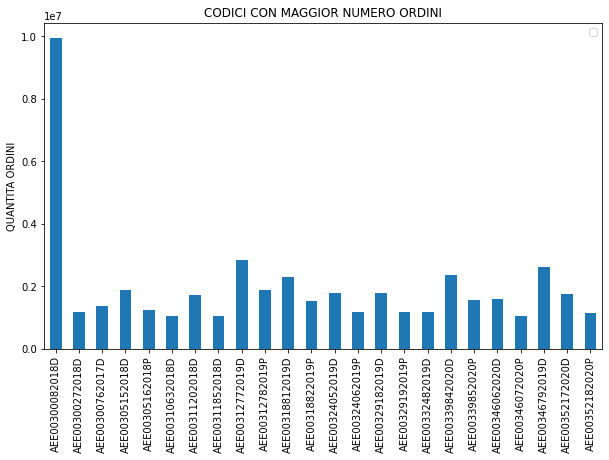

In [10]:
# istogramma CODICI CON MAGGIOR NUMERO ORDINI
plt.figure(figsize=(10, 6))

# soglia minima vendite analizzate
cutoff = 1e6
mask = df['a_quantita'] > cutoff
# stat = df[mask].groupby(['a_codice_ordine']).agg({'a_quantita': 'sum'})
stat = df[mask].groupby(['a_codice_ordine'])['a_quantita'].sum()
stat.plot.bar()
plt.title('CODICI CON MAGGIOR NUMERO ORDINI')
plt.xlabel('')
plt.ylabel('QUANTITA ORDINI')
plt.legend('')
plt.show()

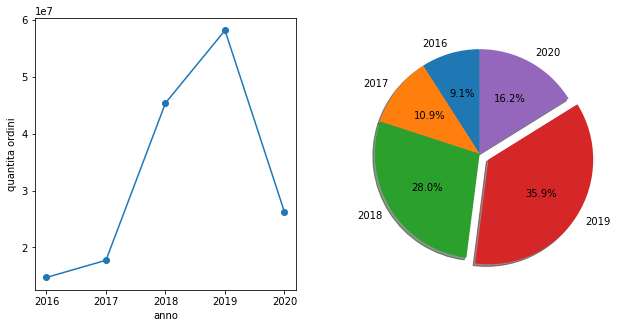

In [11]:
explode = (0, 0, 0, 0.1, 0)
stat = df.groupby(['a_anno'])['a_quantita'].sum()

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(stat, marker='o')
ax[0].set(xlabel='anno', ylabel='quantita ordini')

ax[1] = plt.pie(stat, explode=explode, labels=stat.index, autopct='%1.1f%%', shadow=True, startangle=90)

fig.subplots_adjust(left=.1, right=.9)

plt.show()

a_cod_categoria
1       1801403
2       4844895
3      22987828
4      12431997
5     106351555
6       9057628
7       2508734
8       1429974
9        817777
10        10492
Name: a_quantita, dtype: int64


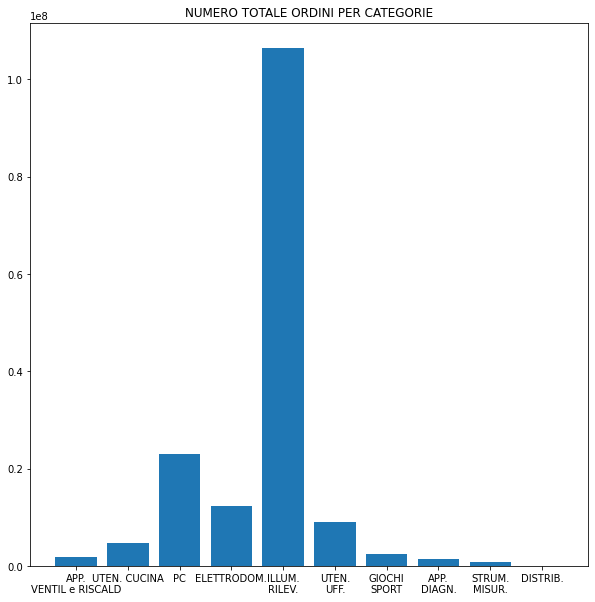

In [12]:
# NUMERO TOTALE ORDINI PER CATEGORIE 
stat = df.groupby(['a_cod_categoria'])['a_quantita'].sum()
print(stat)
plt.figure(figsize=(10, 10))
plt.bar(stat.index, stat, width=0.8)
# plt.xticks(np.arange(1,11), ('FORNI-\nFRIGO', 'TV-\nSCHERMI', 'PC-\nTELEFONIA', 
#                            'INVERTER-\nBATTERIE', 'LAMPADE', 'TORNIO-\nFRESA',
#                           'SPORT', 'LAB', 'TENNOSTATI', 'DISTRIB'))
plt.xticks(np.arange(1,11), ('APP.\nVENTIL e RISCALD', 'UTEN. CUCINA', 'PC', 
                           'ELETTRODOM.', 'ILLUM.\nRILEV.', 'UTEN.\nUFF.',
                          'GIOCHI\nSPORT', 'APP.\nDIAGN.', 'STRUM.\nMISUR.', 'DISTRIB.'))

plt.title('NUMERO TOTALE ORDINI PER CATEGORIE')
plt.savefig('ordini_categorie_hist.png')
plt.show()

# FAI STACKED BAR mettendo le sottocategorie
# CAMBIA TITOLO CATEGORIE? CERCA PAROLA PIù comune nelle descrizioni

# ALGORITMO MACHINE LEARNING PER MODELLI PREDITTIVI

## CLASSIFICAZIONE CATEGORIA OGGETTO A PARTIRE DALLA DESCRIZIONE PRODOTTO

## Creazione del database

In [13]:
from nltk.corpus import stopwords
import re
import string
import sqlite3
import json

categorie = """
    CREATE TABLE if not exists categorie(id INTEGER PRIMARY KEY AUTOINCREMENT, categoria VARCHAR(50) NOT NULL);
"""

descrizioni = """
CREATE TABLE if not exists descrizioni(
       id INTEGER PRIMARY KEY AUTOINCREMENT,
       descrizione VARCHAR(255) NOT NULL,
       id_categoria INTEGER NOT NULL,
       
       FOREIGN KEY (id_categoria) REFERENCES categorie (id)
    );
"""

# creo il db e mi ci connetto
database = "test_MT.db"
conn = sqlite3.connect(database)
cursor = conn.cursor()


# creo le tabelle
for tabella in (categorie, descrizioni):
    cursor.execute(tabella)

# scrivo i dati 

# categories = ['FORNI-FRIGO', 'TV-SCHERMI', 'PC-TELEFONIA','INVERTER-BATTERIE', 'LAMPADE', 'TORNIO-FRESA',
#              'SPORT', 'LABORATORIO', 'TERMOSTATI', 'DISTRIB']

categories = ['APP.VENTIL. RISCALD.', 'UTEN. CUCINA', 'PC','ELETTRODOM.', 'ILLUM. RILEV.', 'UTEN. UFF.',
             'GIOCHI SPORT', 'APP. DIAGN.', 'STRUM. MISUR.', 'DISTRIB.']

for el in categories:
    # aggiungo la categoria se non esiste
    q = "INSERT INTO categorie (categoria) VALUES ('{}')"
    cursor.execute(q.format(el))
    
# aggiungo le descrizioni

stopwords = set(stopwords.words('italian'))

regex = re.compile('[%s]' % re.escape(string.punctuation))

def bagOfWords(elem):
    """
    Partiziona la stringa in un elenco di parole.
    rimuove spazi, caratteri di punteggiatura,
    stop words, parole specifiche e caratteri speciali.
    Trasforma tutte le maiuscole in minuscole.
    """
    stringa = str(elem)
    words = stringa.lower().strip().split(' ')
    for word in words:
        word = word.rstrip().lstrip()
        if not re.match(':\/\/.*[\r\n]*', word) \
        and not re.match('^÷*[kg]', word) \
        and not re.match("\d", word) \
        and not re.match('^@.*""', word) \
        and re.match('^[a-z]', word) \
        and not re.match('\s', word) \
        and word not in stopwords:
            word = regex.sub("", word)
            if word:
                word.replace('"', '')
                yield word


# lista array (descrizione, categoria)
v_list = list(df[['a_descrizione', 'a_cod_categoria']].values)

desc = [(list(bagOfWords(desc)), cat) for desc, cat in v_list]

for descrizione, categoria in desc:
    q = """
        INSERT INTO descrizioni (descrizione, id_categoria)
        VALUES
            ("{0}", "{1}")
    """.format(descrizione, categoria)
    cursor.execute(q)



# Ricavare le parole significative nelle descrizioni (temi)

### Uso modulo word_tokenize della libreria nltk per estrarre singole parole (token)

In [14]:
from nltk import word_tokenize

def elabora_corpus(corpus):
    """
    corpus sarà una lista di tuple, formata da:
    [
        ("una descrizione", "categoria1"),
        ("un'altra descrizione", "categoria2")
    ]
    """
    temi = set()
    categorie = set()
    documenti = []
    boo = []
    
    for descrizione, categoria in corpus:
        parole = [
            p.replace("'", '') for p in word_tokenize(descrizione)
            if p not in stopwords
            and p not in string.punctuation
        ]
        temi.update(parole)
        documenti.append((parole, categoria))
        categorie.add(categoria)
    
    temi = list(set(parola for parola in temi))
    categorie = list(categorie)

    return temi, categorie, documenti

In [15]:
# q = """
#     SELECT  descrizione, categoria
#     FROM descrizioni
#     INNER JOIN categorie ON (id_categoria = categorie.id)
# """

# documenti = cursor.execute(q).fetchall()
# print(documenti[3:5])
# boo = []

# for descrizione, categoria in documenti[3:5]:

#     parole = [
#         p.replace("'", '') for p in word_tokenize(descrizione)
#         if p not in stopwords
#         and p not in string.punctuation
#     ]
#     boo.append(all(descrizione)==all(parole))
#     print('D', descrizione)
#     print('P', parole)
        
# print(all(boo))

In [16]:
q = """
    SELECT  descrizione, categoria
    FROM descrizioni
    INNER JOIN categorie ON (id_categoria = categorie.id)
"""

documenti = cursor.execute(q).fetchall()
print(documenti[3:6])

# elabora_corpus(<[(descrizione, categoria)]>)
temi, categorie, documenti = elabora_corpus(documenti)
print("Numero categorie = {}".format(len(categorie)))
print("Numero documenti = {}".format(len(documenti)))
print('Numero temi = {}'.format(len(temi)))


[("['asciugatrici']", 'APP.VENTIL. RISCALD.'), ("['forni', 'microonde']", 'APP.VENTIL. RISCALD.'), ("['apparecchi', 'condizionamento', 'definiti', 'disposizioni', 'attuazione', 'direttiva', 'dell8', 'maggio', 'commissione', 'stabilisce', 'modalità', 'applicazione', 'direttiva', 'consiglio', 'riguarda', 'letichettatura', 'indicante', 'consumo', 'energia', 'forni', 'elettrici', 'uso', 'domestico']", 'APP.VENTIL. RISCALD.')]
Numero categorie = 10
Numero documenti = 18115
Numero temi = 402


# Da un testo al numero

In [17]:
import random

def crea_training_set(documenti, categorie):
    """
    Metodo che ritorna una tupla di due valori:
        - l'array degli input (train_x)
        - l'array degli output (train_y)
        
    I due array hanno lungezza fissa:
     - len(train_x) == len(temi)
     - len(train_y) == len(categorie) 
    """
    training = []
    output_vuota = [0] * len(categorie)
    categorie = list(categorie)

    for parole, categoria in documenti:
        
        temi_descrizione = [parola for parola in parole]
        
        # riempio la lista di input
        riga_input = [1 if t in temi_descrizione else 0 for t in temi]

        # riempio la lista di output
        riga_output = output_vuota[:]
        riga_output[categorie.index(categoria)] = 1

        training.append([riga_input, riga_output])

    # mischio il mazzo
    random.shuffle(training)
    # trasformo in un array
    training = np.array(training)

    # e creo il training set
    train_x = list(training[:, 0])
    train_y = list(training[:, 1])
    return train_x, train_y

In [18]:
# TRAINING CON 12680 delle 18115 descrizioni (70%) a disposizione
PERC = 70
nint = int(len(documenti)*int(PERC)/100)

In [19]:
TRAIN_SET = documenti[:nint]
TEST_SET = documenti[nint:]

X, y = crea_training_set(TRAIN_SET, categorie)

C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [20]:
q = """
    SELECT  categoria
    FROM descrizioni
    INNER JOIN categorie ON (id_categoria = categorie.id)
"""
doc_test = cursor.execute(q).fetchall()

Xtest, ytest = crea_training_set(documenti[6:8], categorie)
print("Categorie = {}".format(categorie))
print(doc_test[6:8])
print(ytest)

Categorie = ['ELETTRODOM.', 'GIOCHI SPORT', 'PC', 'APP. DIAGN.', 'ILLUM. RILEV.', 'DISTRIB.', 'UTEN. CUCINA', 'APP.VENTIL. RISCALD.', 'UTEN. UFF.', 'STRUM. MISUR.']
[('APP.VENTIL. RISCALD.',), ('UTEN. CUCINA',)]
[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]


C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# Il cervello del BOT

#### Rete neurale con 1 livello di input, 2 livelli nascosti, 1 livello di output 

In [21]:
# PARAMETRI INIZIALI
HIDDEN_NODES = 64
EPOCHS = 150

In [22]:
import tensorflow as tf
import tflearn
from tflearn import input_data, fully_connected, regression, DNN


# def ClassificatoreANN(X, y):
#     """
#     Questo metodo definisce e istruisce una 
#     ANN (Artificial Neural Network), di tipo
#     DNN (Deep Neural Network) composta da:
#         - un livello di input, 
#         - due hidden
#         layer,
#         - uno di output.
#     Utilizza softmax come funzione di attivazione.
    
#     I parametri sono:
#        - X: array bidimensionale con i dati di input
#        - y: array bidimensionale con i dati di output
       
#     Una volta definita la struttura della rete neurale,
#     ne viene fatto il training, e il modello viene
#     salvato in un file, chiamato "rete.tflearn".
#     """
    
#     # resetto i dati del grafo
#     tf.compat.v1.reset_default_graph()
    
#     # Definire la Rete Neurale
#     rete = input_data(shape=[None, len(X[0])])
#     rete = fully_connected(rete, HIDDEN_NODES)
#     rete = fully_connected(rete, HIDDEN_NODES)
#     rete = fully_connected(rete, len(y[0]), activation='softmax')
#     rete = regression(rete)
    
#     # Faccio il training
#     model = DNN(rete, tensorboard_dir='logs', tensorboard_verbose=3)
#     model.fit(X, y, n_epoch=EPOCHS, batch_size=8, snapshot_epoch=True, snapshot_step=500, 
#               run_id='TB_{}perc_ep{}_hid_{}'.format(PERC, EPOCHS, HIDDEN_NODES), show_metric=True)
#     # Salvataggio modello
#     model.save('Reti/rete_{}perc_ep{}_hid_{}'.format(PERC, EPOCHS, HIDDEN_NODES))
#     return model

# modello = ClassificatoreANN(X, y)

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [23]:
# PER IL CARICAMENTO

def ClassificatoreANN():
    tf.compat.v1.reset_default_graph()
    rete = input_data(shape=[None, len(X[0])])
    rete = fully_connected(rete, HIDDEN_NODES)
    rete = fully_connected(rete, HIDDEN_NODES)
    rete = fully_connected(rete, len(y[0]), activation='softmax')
    rete = regression(rete)
    
    model = DNN(rete, tensorboard_dir='logs', tensorboard_verbose=3) 
    
    # Caricamento modello precedente
    model.load("Reti/rete_{}perc_ep{}_hid_{}".format(PERC, EPOCHS, HIDDEN_NODES))
    
    # Recupero training
    model.fit(X, y, n_epoch=EPOCHS,
              show_metric=True,
              snapshot_epoch=True,
              run_id='TB_{}perc_ep{}_hid_{}'.format(PERC, EPOCHS, HIDDEN_NODES))
    return model

modello = ClassificatoreANN() 

Training Step: 267599  | total loss: 0.16520 | time: 1.146s
| Adam | epoch: 150 | loss: 0.16520 - acc: 0.8990 -- iter: 12672/12680
Training Step: 267600  | total loss: 0.16339 | time: 1.152s
| Adam | epoch: 150 | loss: 0.16339 - acc: 0.9013 -- iter: 12680/12680
--


In [24]:
# DA LISTA DI PAROLE a LISTA DI 0 e 1
def genera_input(lista_temi):
    """
    Conversione da lista di temi
    a lista di cifre costituita da 0 (no match) e 1 (match)
    """
    lista_input = [0]*len(temi) 
    for tema in lista_temi:
        for i, t in enumerate(temi):
            if t == tema: 
                lista_input[i] = 1
    return(np.array(lista_input))

In [25]:
SOGLIA_ERRORE = 0.25

def classifica(modello, array):
    # genera le probabilità
    prob = modello.predict([array])[0]  # lista delle probabilità associate ad ognuna delle 10 categorie
    # filtro quelle che superano la soglia
    prob_d = {v: prob[i]  for i, v in enumerate(categorie)}
    # print per test pochi dati
#     print('mappa categoria - probabilita:\n{}'.format(prob_d))
    risultati = [
        [i,p] for i,p in enumerate(prob) 
        if p > SOGLIA_ERRORE
    ]
    # ordino per le categorie più probabili in ordine decrescente
    risultati.sort(key=lambda x: x[1], reverse=True)
    lista_categorie = []
    for r in risultati:
        lista_categorie.append((list(categorie)[r[0]], r[1]))
    return lista_categorie

In [26]:
def trova_categorie(modello, temi_descrizione):
#     print('\nTEMI DESCRIZIONE IN INGRESSO {}\n'.format(temi_descrizione))
    X = genera_input(temi_descrizione)
    # genero la classifica delle categorie predette (almeno con 25%)
    # inserendo i temi di input nel modello di rete neurale  
    categorie_predette = classifica(modello, X)
    
    if categorie_predette:
        # SELEZIONO CATEGORIE CON PROBABILITA' >= SOGLIA_ERRORE = 25%
        return categorie_predette

In [27]:
cat_list = ['APP.VENTIL. RISCALD.', 'UTEN. CUCINA', 'PC','ELETTRODOM.', 'ILLUM. RILEV.', 'UTEN. UFF.',
           'GIOCHI SPORT', 'APP. DIAGN.', 'STRUM. MISUR.', 'DISTRIB.']

In [28]:
def estrai_temi(doc_in):
    """
    Estraggo i temi a partire
    dal documento in ingresso
    costituito dalla lista di tuple
    (descrizione, categoria)
    """
    temi_in = set()
    for descrizione in doc_in:
        temi_in.update([descrizione])

    temi_test = list(temi_in)
    
    return temi_test

# TEST FUNZIONAMENTO

## TRAIN SET

In [29]:
# Prova esempio di 3 dati all'interno intervallo righe tra 12681 e 18115 (test set)

cat_oss = []
cat_pred = []

# prova qui documenti[12697:12700]

for i, (desc_in, categoria_in) in enumerate(TRAIN_SET[:3]):
    print('\nTRAIN SET no. {}'.format(i+1))
    temi_test = estrai_temi(desc_in)
    print('\ncategoria osservata: {}'.format(categoria_in))
    cat_oss.append(categoria_in)
    c_pred = trova_categorie(modello, temi_test)
    cat_pred.append(c_pred[0][0])
    print('\nLe principali categorie (>=25%) predette sono {} [(cat, prob)] --> {}'
          .format(len(c_pred), [(c_pred[i][0], c_pred[i][1]) for i in range(len(c_pred))]))
    print('\n<-------------------------------->')
    
# comparazione categoria osservata e categoria predetta con maggiore probabilità

# l1 = ['a', 'b', 'c']
# l2 = ['d', 'b', 'c']

# l1 = np.array(l1)
# l2 = np.array(l2)
# print(np.all(l1==l2))

cat_oss = np.array(cat_oss)
cat_pred = np.array(cat_pred)
print('\nComparazione per le {} categorie osservate vs predette {}'.format(len(cat_oss), np.all(cat_oss==cat_pred)))


TRAIN SET no. 1

categoria osservata: APP.VENTIL. RISCALD.

Le principali categorie (>=25%) predette sono 1 [(cat, prob)] --> [('APP.VENTIL. RISCALD.', 0.9980482)]

<-------------------------------->

TRAIN SET no. 2

categoria osservata: APP.VENTIL. RISCALD.

Le principali categorie (>=25%) predette sono 1 [(cat, prob)] --> [('APP.VENTIL. RISCALD.', 0.9980482)]

<-------------------------------->

TRAIN SET no. 3

categoria osservata: APP.VENTIL. RISCALD.

Le principali categorie (>=25%) predette sono 2 [(cat, prob)] --> [('ELETTRODOM.', 0.6092138), ('APP.VENTIL. RISCALD.', 0.3882116)]

<-------------------------------->

Comparazione per le 3 categorie osservate vs predette False


In [30]:
cat_oss = []
cat_pred = []

# prova qui documenti[12697:12700]

for i, (desc_in, categoria_in) in enumerate(TRAIN_SET):
#     print('\nTEST no. {}'.format(i+1))
    temi_test = estrai_temi(desc_in)
#     print('\ncategoria osservata: {}'.format(categoria_in))
    cat_oss.append(categoria_in)
    c_pred = trova_categorie(modello, temi_test)
    cat_pred.append(c_pred[0][0])
#     print('\nLe principali categorie (>=25%) predette sono {} [(cat, prob)] --> {}'
#           .format(len(c_pred), [(c_pred[i][0], c_pred[i][1]) for i in range(len(c_pred))]))
#     print('\n<-------------------------------->')
    
# comparazione categoria osservata e categoria predetta con maggiore probabilità
cat_oss = np.array(cat_oss)
cat_pred = np.array(cat_pred)
# print('\nComparazione per le {} categorie osservate vs predette {}'.format(len(cat_oss), cat_oss==cat_pred))
# print('Tutte le categorie {} osservate corrispondo a quelle predette ? --> {}'.format(len(cat_oss), np.all(cat_oss==cat_pred)))



True     11356
False     1324
Name: Equality, dtype: int64


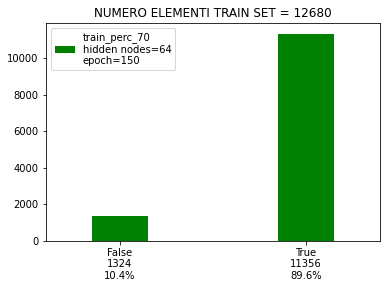

In [31]:
data = {
    'Cat. Osservata': cat_oss,
    'Cat. Predetta': cat_pred
}

df_stat = pd.DataFrame(data, columns=data.keys())
df_stat['Equality'] = cat_oss == cat_pred

stat = df_stat['Equality'].value_counts()
print(stat)

# -------------- PLOT --------------
stat.plot(kind='bar', width=.3, color='green')
plt.title('NUMERO ELEMENTI TRAIN SET = {}'.format(len(TRAIN_SET)))
pc = [int(stat.iloc[0])/len(TRAIN_SET)*100, int(stat.iloc[1])/len(TRAIN_SET)*100]
plt.xticks([stat.index[0], stat.index[1]], ['{}\n{}\n{:2.1f}%'.format(stat.index[0], stat.iloc[0], pc[0]), 
                          '{}\n{}\n{:2.1f}%'.format(stat.index[1], stat.iloc[1], pc[1])], rotation=0)
plt.legend(['train_perc_{}\nhidden nodes={}\nepoch={}'.format(PERC, HIDDEN_NODES, EPOCHS)])
# plt.savefig('Plot/equality_train_perc_{}_{}_hidden_nodes_epoch_{}.png'.format(PERC, HIDDEN_NODES, EPOCHS))
plt.show()

## TEST SET

In [32]:
cat_oss = []
cat_pred = []

# prova qui documenti[12697:12700]

for i, (desc_in, categoria_in) in enumerate(TEST_SET[46:50]):
    print('\nTEST no. {}'.format(i+1))
    temi_test = estrai_temi(desc_in)
    print('\ncategoria osservata: {}'.format(categoria_in))
    cat_oss.append(categoria_in)
    c_pred = trova_categorie(modello, temi_test)
    cat_pred.append(c_pred[0][0])
    print('\nLe principali categorie (>=25%) predette sono {} [(cat, prob)] --> {}'
          .format(len(c_pred), [(c_pred[i][0], c_pred[i][1]) for i in range(len(c_pred))]))
    print('\n<-------------------------------->')
    
# comparazione categoria osservata e categoria predetta con maggiore probabilità
cat_oss = np.array(cat_oss)
cat_pred = np.array(cat_pred)
print('\nComparazione per le {} categorie osservate vs predette {}'.format(len(cat_oss), cat_oss==cat_pred))
print('Tutte le categorie {} osservate corrispondo a quelle predette ? --> {}'.format(len(cat_oss), np.all(cat_oss==cat_pred)))


TEST no. 1

categoria osservata: PC

Le principali categorie (>=25%) predette sono 2 [(cat, prob)] --> [('ILLUM. RILEV.', 0.6870026), ('PC', 0.30915502)]

<-------------------------------->

TEST no. 2

categoria osservata: ELETTRODOM.

Le principali categorie (>=25%) predette sono 1 [(cat, prob)] --> [('ELETTRODOM.', 0.99426866)]

<-------------------------------->

TEST no. 3

categoria osservata: ELETTRODOM.

Le principali categorie (>=25%) predette sono 1 [(cat, prob)] --> [('ELETTRODOM.', 0.99947864)]

<-------------------------------->

TEST no. 4

categoria osservata: ILLUM. RILEV.

Le principali categorie (>=25%) predette sono 1 [(cat, prob)] --> [('ILLUM. RILEV.', 0.81944364)]

<-------------------------------->

Comparazione per le 4 categorie osservate vs predette [False  True  True  True]
Tutte le categorie 4 osservate corrispondo a quelle predette ? --> False


In [33]:
cat_oss = []
cat_pred = []

# prova qui documenti[12697:12700]

for i, (desc_in, categoria_in) in enumerate(TEST_SET):
#     print('\nTEST no. {}'.format(i+1))
    temi_test = estrai_temi(desc_in)
#     print('\ncategoria osservata: {}'.format(categoria_in))
    cat_oss.append(categoria_in)
    c_pred = trova_categorie(modello, temi_test)
    cat_pred.append(c_pred[0][0])
#     print('\nLe principali categorie (>=25%) predette sono {} [(cat, prob)] --> {}'
#           .format(len(c_pred), [(c_pred[i][0], c_pred[i][1]) for i in range(len(c_pred))]))
#     print('\n<-------------------------------->')
    
# comparazione categoria osservata e categoria predetta con maggiore probabilità
cat_oss = np.array(cat_oss)
cat_pred = np.array(cat_pred)
# print('\nComparazione per le {} categorie osservate vs predette {}'.format(len(cat_oss), cat_oss==cat_pred))
# print('Tutte le categorie {} osservate corrispondo a quelle predette ? --> {}'.format(len(cat_oss), np.all(cat_oss==cat_pred)))

True     4867
False     568
Name: Equality, dtype: int64


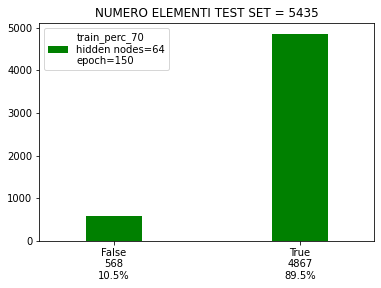

In [34]:
data = {
    'Cat. Osservata': cat_oss,
    'Cat. Predetta': cat_pred
}

df_stat = pd.DataFrame(data, columns=data.keys())
df_stat['Equality'] = cat_oss == cat_pred

stat = df_stat['Equality'].value_counts()
print(stat)

# -------------- PLOT --------------
stat.plot(kind='bar', width=.3, color='green')
plt.title('NUMERO ELEMENTI TEST SET = {}'.format(len(TEST_SET)))
pc = [int(stat.iloc[0])/len(TEST_SET)*100, int(stat.iloc[1])/len(TEST_SET)*100]
plt.xticks([stat.index[0], stat.index[1]], ['{}\n{}\n{:2.1f}%'.format(stat.index[0], stat.iloc[0], pc[0]), 
                          '{}\n{}\n{:2.1f}%'.format(stat.index[1], stat.iloc[1], pc[1])], rotation=0)
plt.legend(['train_perc_{}\nhidden nodes={}\nepoch={}'.format(PERC, HIDDEN_NODES, EPOCHS)])
# plt.savefig('Plot/equality_test_perc_{}_{}_hidden_nodes_epoch_{}.png'.format(PERC, HIDDEN_NODES, EPOCHS))
plt.show()

# ACCURATEZZA MODELLO

## TRAINING SET

       HID COL              
            64    128    256
EP 50    11381  11397  11347
   100   11384  11394  11352
   150   11445  11398  11392


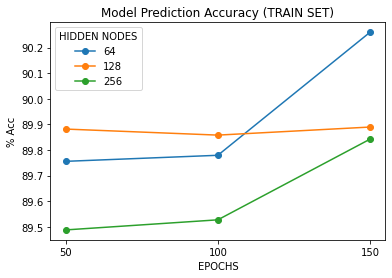

In [35]:
## number True vs epoch
import pandas as pd
import matplotlib.pyplot as plt

TRAIN_SET = 12680 *[1]

ind = [('EP', '50'), ('EP', '100'), ('EP', '150')]
col = [('HID COL', '64'), ('HID COL', '128'), ('HID COL', '256')]

data = [[11381, 11397, 11347], [11384, 11394, 11352], [11445, 11398, 11392]]

df = pd.DataFrame(data, index=ind, columns=col)

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index = pd.MultiIndex.from_tuples(df.index)

print(df)

y0 = df.loc[df.index[0], ('HID COL', '64')] / len(TRAIN_SET) *100
y1= df.loc[df.index[1], ('HID COL', '64')] / len(TRAIN_SET) *100
y2 = df.loc[df.index[2], ('HID COL', '64')] / len(TRAIN_SET) * 100

y64 = [y0, y1, y2]
y64 = df.loc[df.index, ('HID COL', '64')] / len(TRAIN_SET) * 100

y0 = df.loc[df.index[0], ('HID COL', '128')] / len(TRAIN_SET) *100
y1= df.loc[df.index[1], ('HID COL', '128')] / len(TRAIN_SET) *100
y2 = df.loc[df.index[2], ('HID COL', '128')] / len(TRAIN_SET) *100

y128 = [y0, y1, y2]

y0 = df.loc[df.index[0], ('HID COL', '256')] / len(TRAIN_SET) *100
y1= df.loc[df.index[1], ('HID COL', '256')] / len(TRAIN_SET) *100
y2 = df.loc[df.index[2], ('HID COL', '256')] / len(TRAIN_SET) *100

y256 = [y0, y1, y2]

EP = [50, 100, 150]

plt.plot(EP, y64, label='64', marker='o')
plt.plot(EP, y128, label='128', marker='o')
plt.plot(EP, y256, label='256', marker='o')

plt.title('Model Prediction Accuracy (TRAIN SET)')
plt.xlabel('EPOCHS')
plt.ylabel('% Acc')
plt.xticks([50, 100, 150])
plt.legend(title='HIDDEN NODES')
plt.show()

## TEST SET

       HID COL            
            64   128   256
EP 50     4726  4736  4652
   100    4834  4749  4693
   150    4888  4891  4919


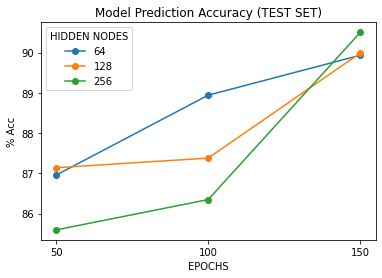

In [36]:
## number True vs epoch
import pandas as pd
import matplotlib.pyplot as plt

TRAIN_SET = 5435 *[1]

ind = [('EP', '50'), ('EP', '100'), ('EP', '150')]
col = [('HID COL', '64'), ('HID COL', '128'), ('HID COL', '256')]

data = [[4726, 4736, 4652], [4834, 4749, 4693], [4888, 4891, 4919]]

df = pd.DataFrame(data, index=ind, columns=col)

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index = pd.MultiIndex.from_tuples(df.index)

print(df)

y0 = df.loc[df.index[0], ('HID COL', '64')] / len(TRAIN_SET) *100
y1= df.loc[df.index[1], ('HID COL', '64')] / len(TRAIN_SET) *100
y2 = df.loc[df.index[2], ('HID COL', '64')] / len(TRAIN_SET) * 100

y64 = [y0, y1, y2]

y0 = df.loc[df.index[0], ('HID COL', '128')] / len(TRAIN_SET) *100
y1= df.loc[df.index[1], ('HID COL', '128')] / len(TRAIN_SET) *100
y2 = df.loc[df.index[2], ('HID COL', '128')] / len(TRAIN_SET) *100

y128 = [y0, y1, y2]

y0 = df.loc[df.index[0], ('HID COL', '256')] / len(TRAIN_SET) *100
y1= df.loc[df.index[1], ('HID COL', '256')] / len(TRAIN_SET) *100
y2 = df.loc[df.index[2], ('HID COL', '256')] / len(TRAIN_SET) *100

y256 = [y0, y1, y2]

EP = [50, 100, 150]

plt.plot(EP, y64, label='64', marker='o')
plt.plot(EP, y128, label='128', marker='o')
plt.plot(EP, y256, label='256', marker='o')

plt.title('Model Prediction Accuracy (TEST SET)')
plt.xlabel('EPOCHS')
plt.ylabel('% Acc')
plt.xticks([50, 100, 150])
plt.legend(title='HIDDEN NODES')
plt.show()